In [2]:
%matplotlib inline



In [3]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



In [4]:
print("The kernel is working...")

The kernel is working...


# Introduction to Machine Learning
## Live Demo

In [5]:
passenger_data = pd.read_csv("dataset/train.csv", true_values = ["True"], false_values = ["False"])

In [6]:
passenger_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
passenger_data.dtypes 

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [17]:
passenger_data.PassengerId.sample(50)

3434    3703_02
2912    3152_01
5899    6253_02
7526    8050_01
1147    1211_07
1421    1500_06
7054    7507_03
547     0576_01
5051    5397_03
407     0445_02
8443    9018_01
3921    4183_01
8526    9103_01
3253    3492_01
518     0555_01
6561    6921_05
4920    5247_01
6413    6774_03
3743    4005_08
2367    2549_02
4396    4663_06
4687    4998_01
5149    5499_01
2469    2647_01
5123    5471_01
5557    5925_01
3851    4128_01
4746    5063_01
6105    6446_03
7099    7565_04
8591    9170_01
7961    8504_02
7853    8381_01
6629    6992_01
798     0840_01
2471    2649_01
3273    3518_01
5731    6071_01
1898    2028_01
718     0757_01
3132    3382_02
1544    1635_01
2742    2944_02
390     0431_01
7001    7446_01
3560    3826_01
4675    4981_01
1618    1712_02
392     0433_01
3097    3337_02
Name: PassengerId, dtype: object

In [8]:
passenger_data.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [10]:
passenger_data.HomePlanet.value_counts(dropna = False)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

In [11]:
passenger_data[passenger_data.HomePlanet.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.0,0.0,NaN,0.0,0.0,Colatz Keen,True
113,0119_01,NaN,False,A/0/P,TRAPPIST-1e,39.0,False,0.0,2344.0,0.0,65.0,6898.0,Batan Coning,False
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.0,0.0,NaN,0.0,0.0,Arraid Inicont,True
225,0242_01,NaN,False,F/46/S,TRAPPIST-1e,18.0,False,313.0,1.0,691.0,283.0,0.0,Almone Sté,False
234,0251_01,NaN,True,C/11/S,55 Cancri e,54.0,False,0.0,0.0,0.0,0.0,0.0,Diphah Amsive,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8515,9084_01,NaN,False,E/582/P,TRAPPIST-1e,25.0,False,1258.0,0.0,22.0,19.0,0.0,Jurs Mone,False
8613,9194_01,NaN,False,E/603/S,55 Cancri e,53.0,False,0.0,4017.0,0.0,13.0,3147.0,NaN,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False


In [12]:
passenger_data.HomePlanet.astype("category")

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: category
Categories (3, object): ['Earth', 'Europa', 'Mars']

In [15]:
passenger_data.CryoSleep.value_counts(dropna = False)

CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

In [19]:
destinations = passenger_data.Destination.value_counts().sort_values(ascending=True)

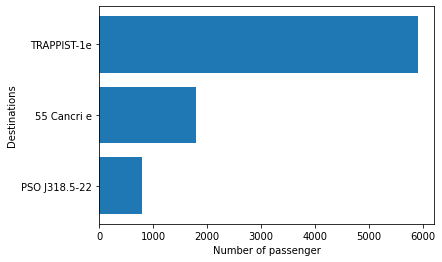

In [24]:
plt.barh(destinations.index, destinations)
plt.xlabel("Number of passenger")
plt.ylabel("Destinations")
plt.show()

In [6]:
num_passenger = passenger_data.PassengerId \
.str.split("_", expand = True)[0]\
.value_counts().value_counts()\
#.sort_values(ascending = True)

NameError: name 'passenger_data' is not defined

In [5]:
plt.barh(num_passenger.index, num_passenger)

NameError: name 'plt' is not defined

In [4]:
passenger_data.Transported.value_counts(dropna = False)

NameError: name 'passenger_data' is not defined